# Image classification system
### Using Deep Learning

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import joblib

## Step 1: Loading the dataset

In [83]:
train_dir = "c:/Users/ritin/OneDrive/Documentos/4GEEKS/1_CURSO/PROJETOS/RitaViegas---Image-Classifier-Project-main/data/raw/train/train_data"
test1_dir = "c:/Users/ritin/OneDrive/Documentos/4GEEKS/1_CURSO/PROJETOS/RitaViegas---Image-Classifier-Project-main/data/raw/test1/test_data"

if os.path.exists(train_dir):
    print("Files in train_dir:", os.listdir(train_dir)[:10])
if os.path.exists(test1_dir):
    print("Files in test1_dir:", os.listdir(test1_dir)[:10])


Files in train_dir: ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg']
Files in test1_dir: ['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg']


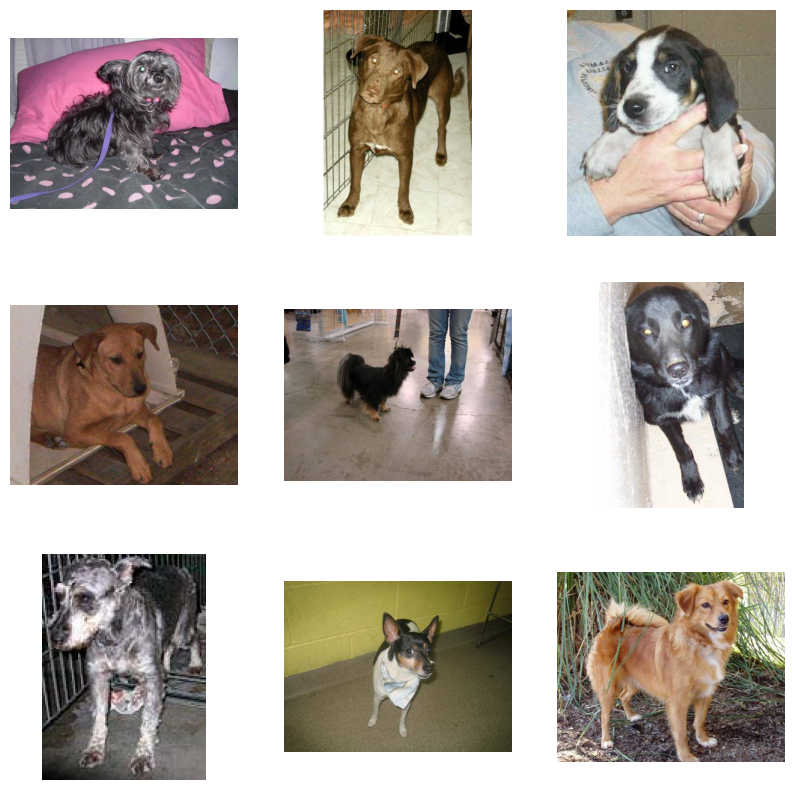

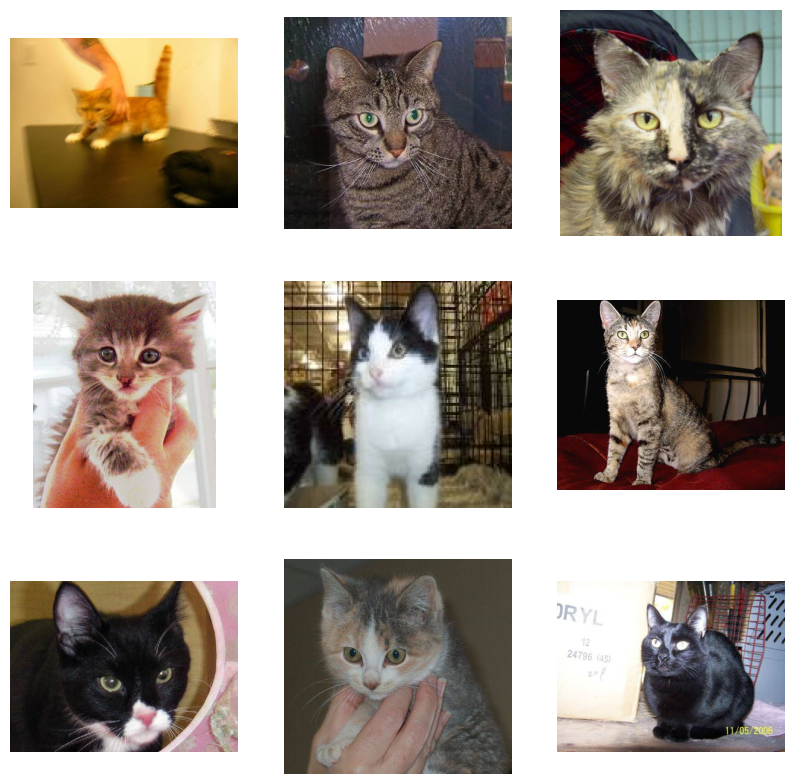

In [ ]:
def plot_images_from_directory(directory, keyword, count=9):
    img_files = [os.path.join(directory, f) for f in os.listdir(directory) if keyword in f]
    img_files = img_files[:count]  

    # Criar um grid para exibir as imagens
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < len(img_files):
            img = plt.imread(img_files[i])
            ax.imshow(img)
            ax.axis('off')
    plt.show()


plot_images_from_directory(train_dir, "dog")
plot_images_from_directory(train_dir, "cat")


In [79]:
from PIL import Image
# Diretórios de origem e destino
train_dir = "c:/Users/ritin/OneDrive/Documentos/4GEEKS/1_CURSO/PROJETOS/RitaViegas---Image-Classifier-Project-main/data/raw/train/train_data"
test1_dir = "c:/Users/ritin/OneDrive/Documentos/4GEEKS/1_CURSO/PROJETOS/RitaViegas---Image-Classifier-Project-main/data/raw/test1/test_data"

# Diretórios de destino para imagens redimensionadas
output_train_dir = "c:/Users/ritin/OneDrive/Documentos/4GEEKS/1_CURSO/PROJETOS/RitaViegas---Image-Classifier-Project-main/data/processed/train"
output_test1_dir = "c:/Users/ritin/OneDrive/Documentos/4GEEKS/1_CURSO/PROJETOS/RitaViegas---Image-Classifier-Project-main/data/processed/test1"

# Garantir que os diretórios de destino existem
os.makedirs(output_train_dir, exist_ok=True)
os.makedirs(output_test1_dir, exist_ok=True)

# Função para redimensionar imagens
def resize_images(input_dir, output_dir, size=(200, 200)):
    for filename in os.listdir(input_dir):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        
        try:
            with Image.open(input_path) as img:
                # Redimensionar a imagem e salvar no diretório de destino
                img_resized = img.resize(size)
                img_resized.save(output_path)
                print(f"Imagem {filename} redimensionada e salva em {output_dir}")
        except Exception as e:
            print(f"Erro ao processar a imagem {filename}: {e}")

# Redimensionar imagens de treino e teste
resize_images(train_dir, output_train_dir)
resize_images(test1_dir, output_test1_dir)


Imagem cat.0.jpg redimensionada e salva em c:/Users/ritin/OneDrive/Documentos/4GEEKS/1_CURSO/PROJETOS/RitaViegas---Image-Classifier-Project-main/data/processed/train
Imagem cat.1.jpg redimensionada e salva em c:/Users/ritin/OneDrive/Documentos/4GEEKS/1_CURSO/PROJETOS/RitaViegas---Image-Classifier-Project-main/data/processed/train
Imagem cat.10.jpg redimensionada e salva em c:/Users/ritin/OneDrive/Documentos/4GEEKS/1_CURSO/PROJETOS/RitaViegas---Image-Classifier-Project-main/data/processed/train
Imagem cat.100.jpg redimensionada e salva em c:/Users/ritin/OneDrive/Documentos/4GEEKS/1_CURSO/PROJETOS/RitaViegas---Image-Classifier-Project-main/data/processed/train
Imagem cat.1000.jpg redimensionada e salva em c:/Users/ritin/OneDrive/Documentos/4GEEKS/1_CURSO/PROJETOS/RitaViegas---Image-Classifier-Project-main/data/processed/train
Imagem cat.10000.jpg redimensionada e salva em c:/Users/ritin/OneDrive/Documentos/4GEEKS/1_CURSO/PROJETOS/RitaViegas---Image-Classifier-Project-main/data/processed/

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


ModuleNotFoundError: No module named 'tensorflow.python'

In [81]:
!pip uninstall tensorflow


In [82]:
!pip install tensorflow==2.12


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/272.9 MB 5.6 MB/s eta 0:00:49
   ---------------------------------------- 2.6/272.9 MB 6.3 MB/s eta 0:00:43
    --------------------------------------- 3.9/272.9 MB 6.2 MB/s eta 0:00:44
    --------------------------------------- 5.2/272.9 MB 6.1 MB/s eta 0:00:44
    --------------------------------------- 6.0/272.9 MB 5.7 MB/s eta 0:00:48
   - -------------------------------------- 7.3/272.9 MB 5.7 MB/s eta 0:00:47
   - -------------------------------------- 8.7/272.9 MB 5.8 MB/s eta 0:00:46
   - -------------------------------------- 10.0/272.9 MB 5.9 MB/s eta 0:00:45
   - -------------------------------------- 11.3/272.9 MB 5.9 MB/s eta 0:00:45
   - -------------------------------------- 12.6/272.9 MB 5.9 MB/s eta 0:00:44
   -- 

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\ritin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [ ]:
import tensorflow as tf
print(tf.__version__)


In [ ]:
# Criar geradores de dados para treinamento e teste
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalizar valores de pixels para o intervalo [0, 1]
    validation_split=0.2  # Separar 20% dos dados para validação
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0  # Apenas normalizar para o conjunto de teste
)


In [ ]:
# Diretório para as imagens de treinamento
train_dir = "caminho/para/seu/diretorio/train"
test_dir = "caminho/para/seu/diretorio/test"

# Gerador para o conjunto de treinamento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),  # Tamanho fixo das imagens
    batch_size=32,  # Número de imagens por batch
    class_mode="binary",  # Classes binárias (cachorro/gato)
    subset="training"  # Dados de treinamento
)

# Gerador para o conjunto de validação
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode="binary",
    subset="validation"  # Dados de validação
)

# Gerador para o conjunto de teste
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode="binary"
)


In [ ]:
# Exibir as classes
print("Classes atribuídas:", train_generator.class_indices)

# Verificar um batch de dados
x_batch, y_batch = next(train_generator)
print("Tamanho do batch de imagens:", x_batch.shape)
print("Tamanho do batch de labels:", y_batch.shape)
